In [1]:
from igraph import *

node_count = 7

# Create graph
g = Graph()

# Add vertices
g.add_vertices(node_count)

for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i+1)

edges = [(0,3), (2,3), (3,4), (4,5), (5,6), (5,1)]

g.add_edges(edges)

g.simplify(multiple=True, loops=False, combine_edges=None)

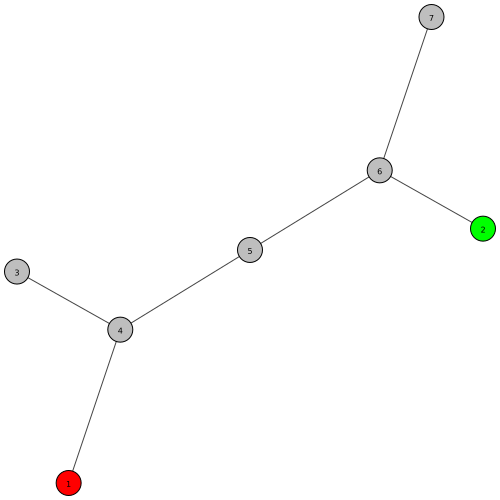

In [2]:
out_fig_name = "graph_plot.png"

visual_style = {}

# Define colors for nodes
node_colours = ["red", "green", "grey", "grey", "grey", "grey", "grey"]
g.vs["color"] = node_colours

# Set bbox and margin
visual_style["bbox"] = (500,500)
visual_style["margin"] = 17

# # Scale vertices based on degree
# outdegree = g.outdegree()
visual_style["vertex_size"] = 25

# Set vertex lable size
visual_style["vertex_label_size"] = 8

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
layout_1 = g.layout_fruchterman_reingold()
visual_style["layout"] = layout_1

# Plot the graph
plot(g, out_fig_name, **visual_style)



In [4]:
import numpy as np
from numpy.linalg import inv

D = np.matrix(np.array([[1,0,0,0,0,0,0], [0,1,0,0,0,0,0], [0,0,1,0,0,0,0], [0,0,0,3,0,0,0], [0,0,0,0,2,0,0], [0,0,0,0,0,3,0], [0,0,0,0,0,0,1]]))
Dinv = inv(D)
Dinv

matrix([[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.5       ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.33333333, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 1.        ]])

In [18]:

## Get the adjacency matrix

In [5]:


A = np.matrix(np.array([[1,0,0,0,0,0,0], [0,1,0,0,0,0,0], [0,0,0,1,0,0,0], [1,0,1,0,1,0,0], [0,0,0,1,0,1,0], [0,1,0,0,1,0,1], [0,0,0,0,0,1,0]]))
A



matrix([[1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0]])

In [17]:
## Multiply the inverse of D and A

In [6]:


S = Dinv*A
S



matrix([[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        ],
        [0.33333333, 0.        , 0.33333333, 0.        , 0.33333333,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.5       , 0.        ,
         0.5       , 0.        ],
        [0.        , 0.33333333, 0.        , 0.        , 0.33333333,
         0.        , 0.33333333],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        ]])

In [16]:
## Label Propagation algorithm

In [7]:
import sys

def LabelPropagation(T, Y, diff, max_iter, labelled):
    
    # Initialize
    Y_init = Y
    Y1 = Y
    
    # Initialize convergence parameters
    n=0
    current_diff = sys.maxsize
    
    # Iterate till difference reduces below diff or till the maximum number of iterations is reached
    while current_diff > diff or n < max_iter:
        
        current_diff = 0.0
        # Set Y(t)
        Y0 = Y1
        
        # Calculate Y(t+1)
        Y1 = T*Y0
        
        # Clamp labelled data
        for i in range(Y_init.shape[0]):
            if i in labelled:
                for j in range(Y_init.shape[1]):
                    if i!=j:
                        Y1.A[i][j] = Y_init.A[i][j]
        
        # Get difference between values of Y(t+1) and Y(t)
        for i in range(Y1.shape[0]):
            for j in range(Y1.shape[1]):
                current_diff += abs(Y1.A[i][j] - Y0.A[i][j])
        
        n += 1
        
    return Y1

In [15]:
##Run label propagation

In [13]:


%%time
Y = np.matrix(np.array([[1,0], [0,1], [0,0], [0,0], [0,0], [0,0], [0,0]]))
L = LabelPropagation(S, Y, 0.0001, 100, [0,1])



CPU times: user 7.38 ms, sys: 0 ns, total: 7.38 ms
Wall time: 6.54 ms


In [14]:
## Final label matrix

In [9]:
L

matrix([[1.  , 0.  ],
        [0.  , 1.  ],
        [0.75, 0.25],
        [0.75, 0.25],
        [0.5 , 0.5 ],
        [0.25, 0.75],
        [0.25, 0.75]])

In [12]:
##Labels of unlabelled nodes

In [10]:
L.argmax(1)

matrix([[0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1]])